In [54]:
import os
import re
import json
import time
import random
import subprocess
from datetime import datetime

In [90]:
def get_speedtest_json():
    """Conducts a single speedtest and returns a json
    with the results.
    """
    
    # pass a subprocess command to cmd to get json
    try:
        out = subprocess.Popen(['speedtest.exe', '-f', 'json'],
                                stdout=subprocess.PIPE,
                                stderr=subprocess.STDOUT)
        stdout, stderr = out.communicate()
    except:
        pass
    
    # decode bytes and transform json into a dict
    _json = stdout.decode('utf-8')
    _dict = json.loads(_json)
    
    return(_dic)

In [82]:
def extract_speeds(dic):
    """Given a dictionary of results from the speedtest,
    perform necessary transformations to return speeds.
    """
    
    # extract download and upload speeds in Mbps
    download = dic['download']['bytes']/1e6
    upload = dic['upload']['bytes']/1e6
    
    # return download an upload speeds as a tuple
    return(download, upload)

In [ ]:
def collect_speeds(iters, mins):
    """Given a number of loop iterations and minutes of wait time
    variations between each iteration, perform and collect speedtest
    results, dates, and times.
    """
    
    # instantiate lists
    day_list = []
    time_list = []
    upload_list = []
    download_list = []
    
    for i in range(iters):
        
        # wait random num secs for up to mins
        secs = random.randint(1, 60*mins)
        time.sleep(secs)
        
        # collect speeds
        _dict = get_speedtest_json()
        up_speed, down_speed = extract_speeds(_dict)
        
        # add to lists
        upload_list.append(up_speed)
        download_list.append(down_speed)
        
        # get dates and times
        now = time.time()
        dt_obj = datetime.fromtimestamp(now)
        
        # transform into readable format
        _day, _time = str(dt_obj).split(' ')
        _time = _time.split('.')[0]  

        # add to lists
        day_list.append(_day)
        time_list.append(_time)

('2020-06-05', '22:06:42')

In [8]:
results = {'speeds':speedlist, 'times':datetimes}

In [66]:
Y1 = ExtractSpeed(results, 'download')
Y2 = ExtractSpeed(results, 'upload')

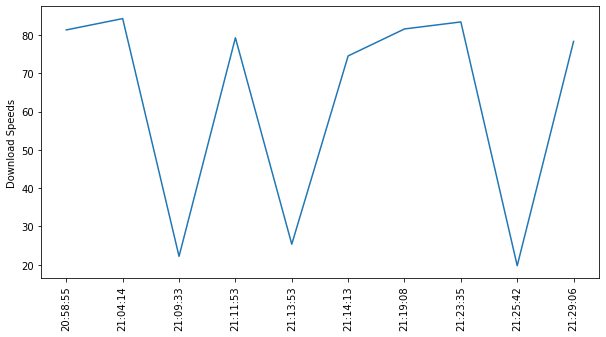

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]

labs = ExtractTime(results)
plt.xticks(range(10), labs, rotation='vertical')
plt.plot(Y1)

plt.ylabel('Download Speeds')
plt.show()

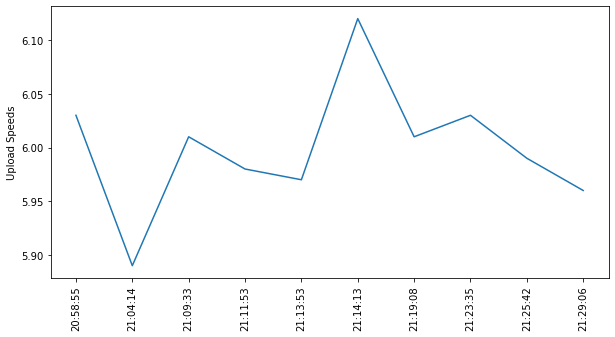

In [74]:
plt.rcParams['figure.figsize'] = [10, 5]

labs = ExtractTime(results)
plt.xticks(range(10), labs, rotation='vertical')
plt.plot(Y2)

plt.ylabel('Upload Speeds')
plt.show()